# Credit Card Fraud Detection

In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

2023-07-14 10:58:43.386457: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-14 10:58:44.621175: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-14 10:58:44.627786: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 10:58:55.513955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Load Dataset

In [2]:
DataFrame = pd.read_csv('DataSets/creditcard.csv')
DataFrame.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
DataFrame.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
DataFrame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Find the null values
DataFrame.isnull().sum().max()

0

In [6]:
DataFrame.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
print('Frauds', round(DataFrame['Class'].value_counts()[1]/len(DataFrame)*100,3), '% of the dataset')
print('No Frauds', round(DataFrame['Class'].value_counts()[0]/len(DataFrame)*100,3), '% of the dataset')

Frauds 0.173 % of the dataset
No Frauds 99.827 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n 0: No Fraud || 1: Fraud')

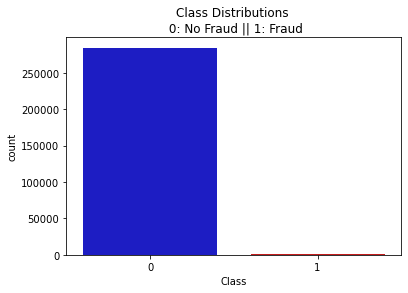

In [8]:
Colors =  ["#0101DF", "#DF0101"]
sns.countplot(data=DataFrame, x='Class', palette=Colors)
plt.title("Class Distributions \n 0: No Fraud || 1: Fraud")

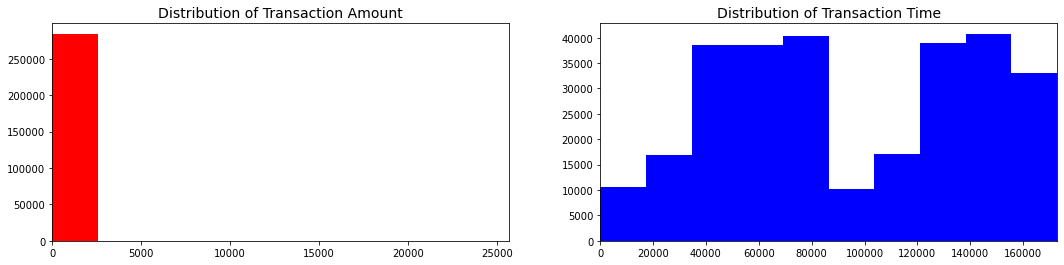

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

Amount = np.array(DataFrame['Amount'])
Time = np.array(DataFrame['Time'])

ax[0].hist(Amount, color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([Amount.min(), Amount.max()])

ax[1].hist(Time, color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([Time.min(), Time.max()])

plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

Standard_Scaler = StandardScaler()
Robust_Scaler = RobustScaler()

DataFrame['Scaled_Amount'] = Robust_Scaler.fit_transform(DataFrame['Amount'].values.reshape(-1,1))
DataFrame['Scaled_Time'] = Robust_Scaler.fit_transform(DataFrame['Time'].values.reshape(-1,1))
DataFrame.drop(['Time', 'Amount'], axis=1, inplace=True)


In [11]:
Scaled_Amount = DataFrame['Scaled_Amount']
Scaled_Time = DataFrame['Scaled_Time']

DataFrame.drop(['Scaled_Amount', 'Scaled_Time'], axis=1, inplace=True)
DataFrame.insert(0, 'Scaled_Amount', Scaled_Amount)
DataFrame.insert(1, 'Scaled_Time', Scaled_Time)

#DataSet Scaled
DataFrame.head(5)


,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Frauds', round(DataFrame['Class'].value_counts()[1]/len(DataFrame)*100,3), '% of the dataset')
print('No Frauds', round(DataFrame['Class'].value_counts()[0]/len(DataFrame)*100,3), '% of the dataset')

X = DataFrame.drop('Class', axis=1)
y = DataFrame['Class']

Stratified = StratifiedKFold(n_splits=6, random_state=None, shuffle=False)

for TrainSet, TestSet in Stratified.split(X, y):
    print("Train:", TrainSet, "Test:", TestSet)
    Original_Xtrain, Original_Xtest = X.iloc[TrainSet], X.iloc[TestSet]
    Original_ytrain, Original_ytest = y.iloc[TrainSet], y.iloc[TestSet]

Frauds 0.173 % of the dataset
No Frauds 99.827 % of the dataset
Train: [ 18472  18773  18809 ... 284804 284805 284806] Test: [    0     1     2 ... 47529 47530 47531]
Train: [     0      1      2 ... 284804 284805 284806] Test: [18472 18773 18809 ... 94986 94987 94988]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 63421  63634  64329 ... 142425 142426 142427]
Train: [     0      1      2 ... 284804 284805 284806] Test: [119781 120505 120837 ... 189912 189913 189914]
Train: [     0      1      2 ... 284804 284805 284806] Test: [152223 152295 153823 ... 237358 237359 237360]
Train: [     0      1      2 ... 237358 237359 237360] Test: [222419 223366 223572 ... 284804 284805 284806]


In [13]:
# Turn into an array
Original_Xtrain = Original_Xtrain.values
Original_Xtest = Original_Xtest.values
Original_ytrain = Original_ytrain.values
Original_ytest = Original_ytest.values

UniqueLabel_train, CountsLabel_train = np.unique(Original_ytrain, return_counts=True)
UniqueLabel_test, CountsLabel_test = np.unique(Original_ytest, return_counts=True)

print('Label distributions: \n')
print(CountsLabel_train/len(Original_ytrain))
print(CountsLabel_test/len(Original_ytest))



Label distributions: 

[0.99827252 0.00172748]
[0.99827248 0.00172752]


In [14]:
DataFrame = DataFrame.sample(frac=1)

Fraud_DF = DataFrame.loc[DataFrame['Class'] == 1]
NonFraud_DF = DataFrame.loc[DataFrame['Class'] == 0][:492]

NormalDistributed_DF = pd.concat([Fraud_DF, NonFraud_DF])

New_DataFrame = pd.concat([Fraud_DF, NonFraud_DF])

New_DataFrame.head()

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
212644,9.863900,0.637343,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,...,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,1
145800,5.998323,0.029488,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,...,1.275358,0.480640,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096,1
42958,-0.167819,-0.509628,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,...,-1.025228,3.058082,0.941180,-0.232710,0.763508,0.075456,-0.453840,-1.508968,-0.686836,1
190368,2.150493,0.518227,-2.272473,2.935226,-4.871394,2.419012,-1.513022,-0.480625,-2.126136,1.883507,...,-0.031085,0.718504,0.893850,-0.031632,0.322913,-0.058406,-0.411649,0.573803,0.176067,1
15451,1.089779,-0.679742,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,...,1.592754,1.754608,-1.466115,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,1


Distribution of the Classes in the subsample dataset
Class
1    0.5
0    0.5
Name: count, dtype: float64


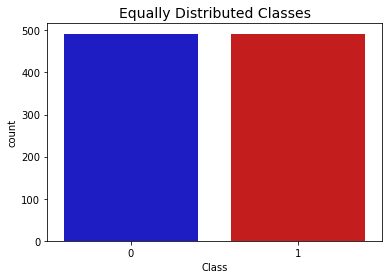

In [15]:
print("Distribution of the Classes in the subsample dataset")
print(New_DataFrame['Class'].value_counts() / len(New_DataFrame))
sns.countplot(x='Class', data=New_DataFrame, palette=Colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## Correlation matrices

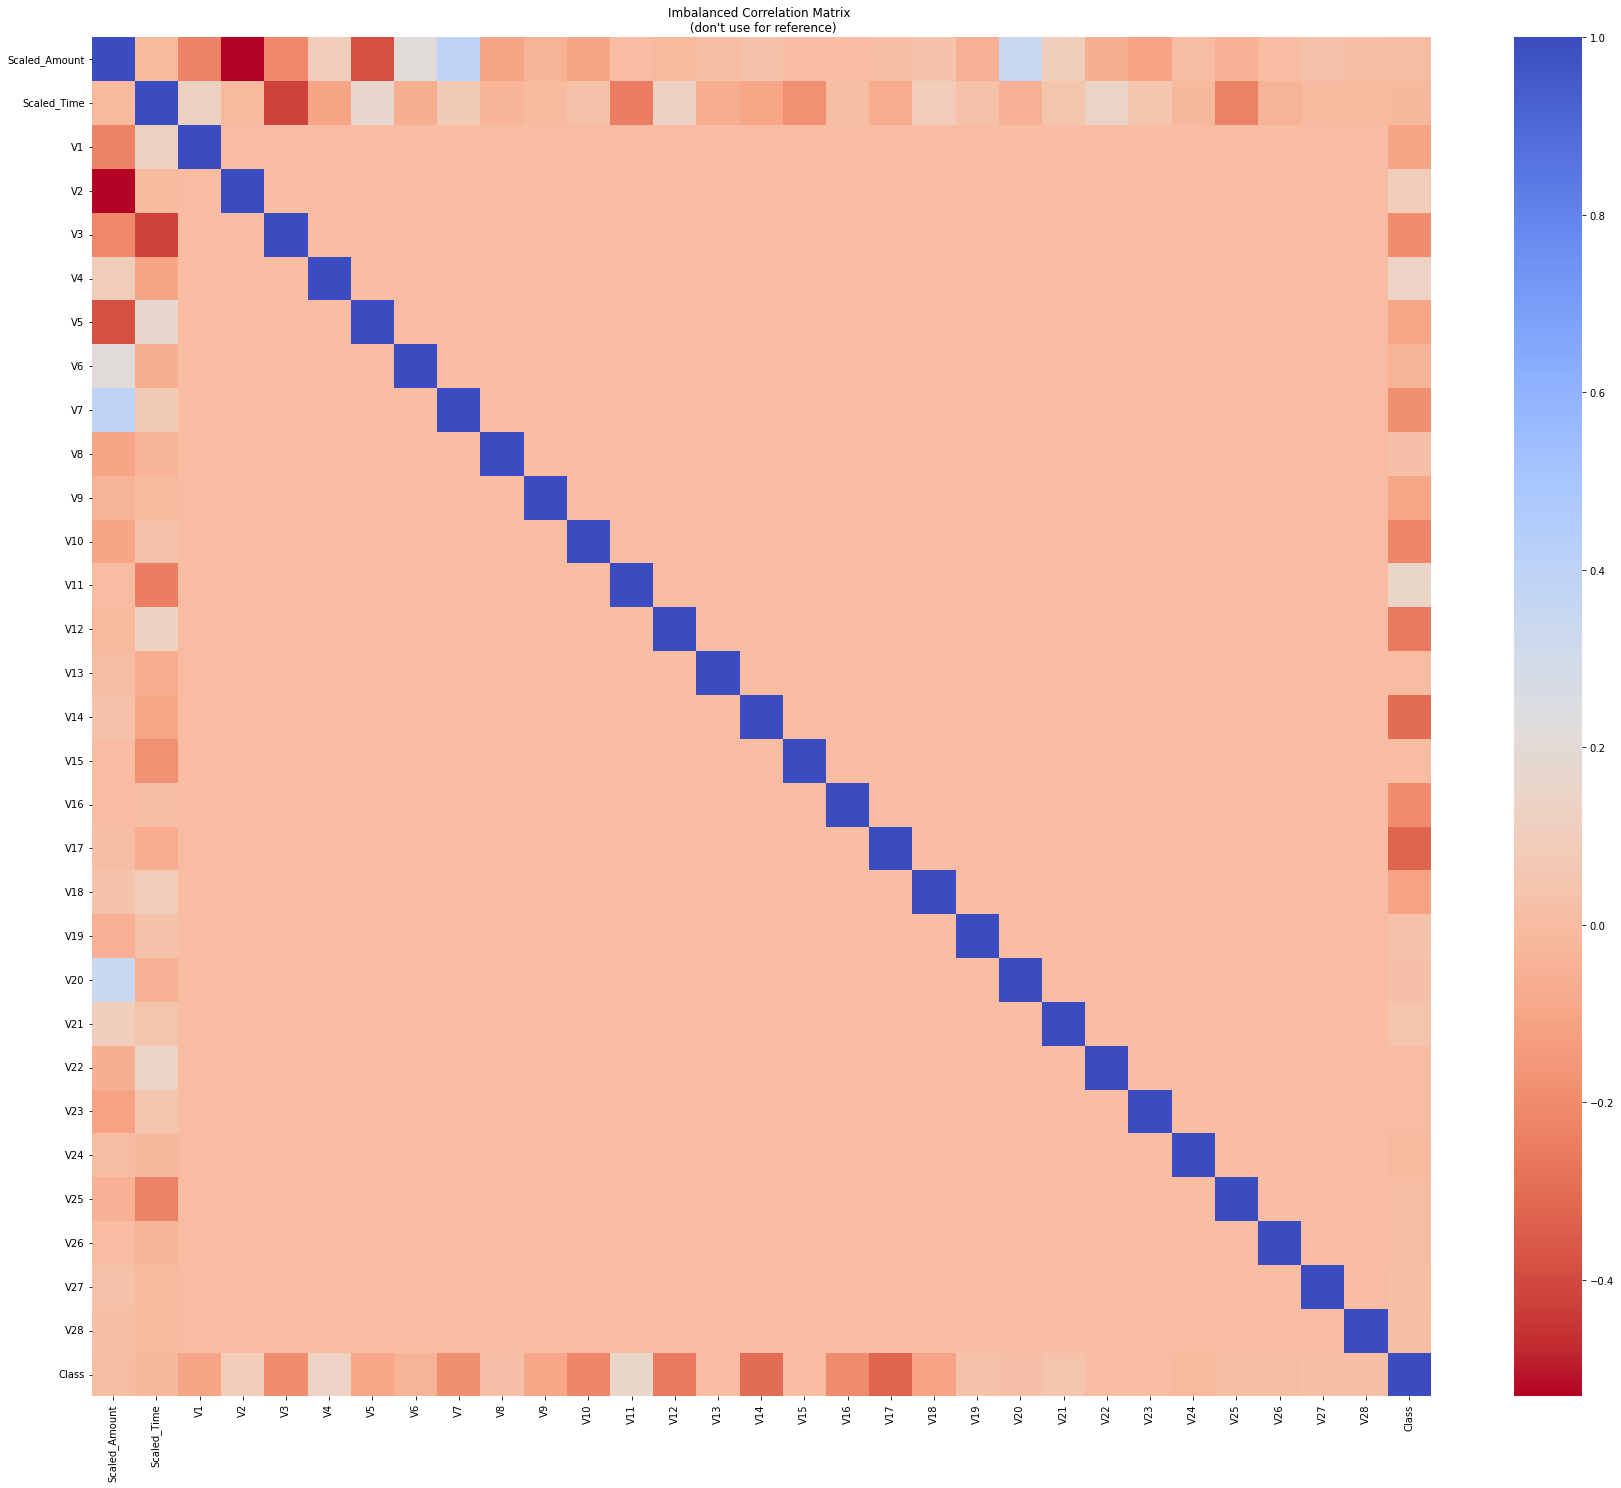

In [16]:
f, ax1 = plt.subplots(figsize=(30,25))

CorrelationMatrix = DataFrame.corr()
sns.heatmap(CorrelationMatrix, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)")

plt.show()

Text(0.5, 1.0, 'SubSample Correlation Matrix \n (use for reference)')

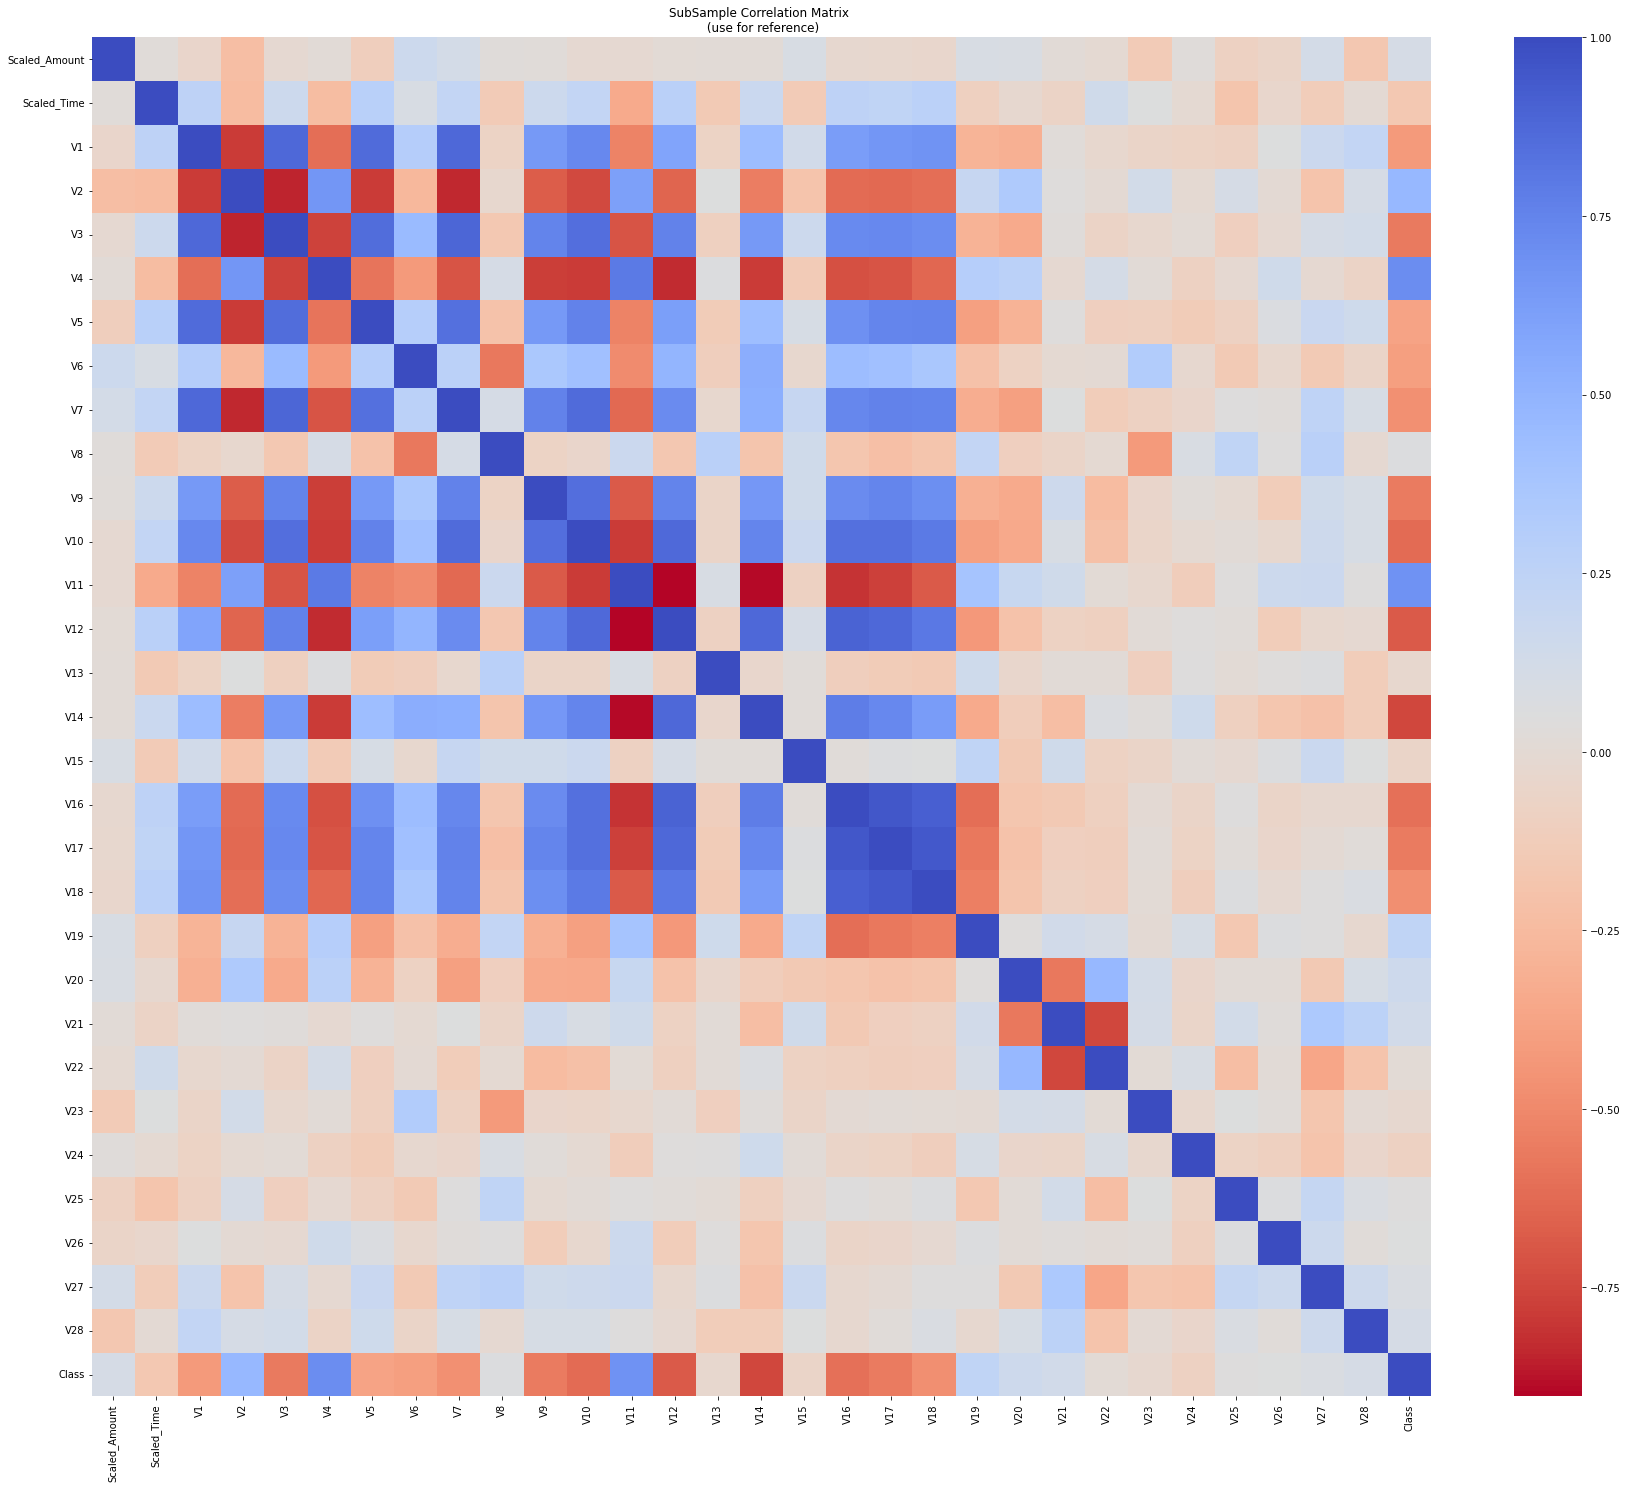

In [17]:
f, ax2 = plt.subplots(figsize=(30,25))
CorrelationMatrix_SubSample = New_DataFrame.corr()
sns.heatmap(CorrelationMatrix_SubSample, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title("SubSample Correlation Matrix \n (use for reference)")

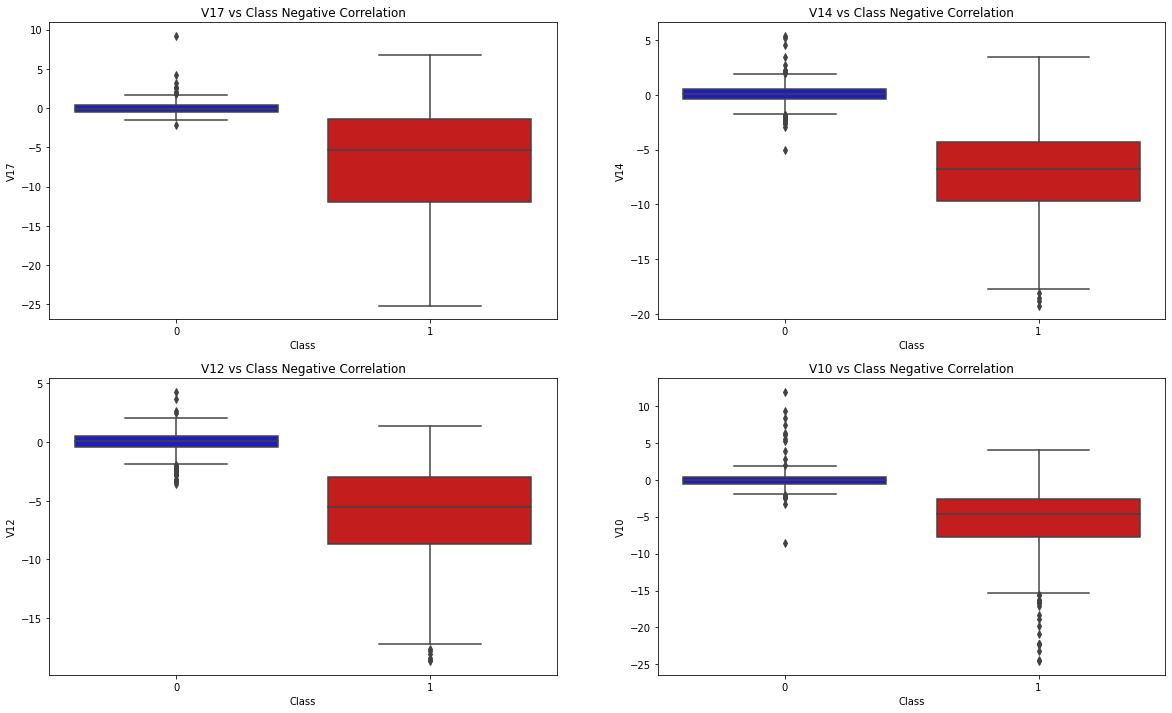

In [18]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,12))
sns.boxplot(x="Class", y="V17", data=New_DataFrame, palette=Colors, ax=axes[0, 0])
axes[0, 0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=New_DataFrame, palette=Colors, ax=axes[0, 1])
axes[0, 1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=New_DataFrame, palette=Colors, ax=axes[1, 0])
axes[1, 0].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=New_DataFrame, palette=Colors, ax=axes[1, 1])
axes[1, 1].set_title('V10 vs Class Negative Correlation')

plt.show()


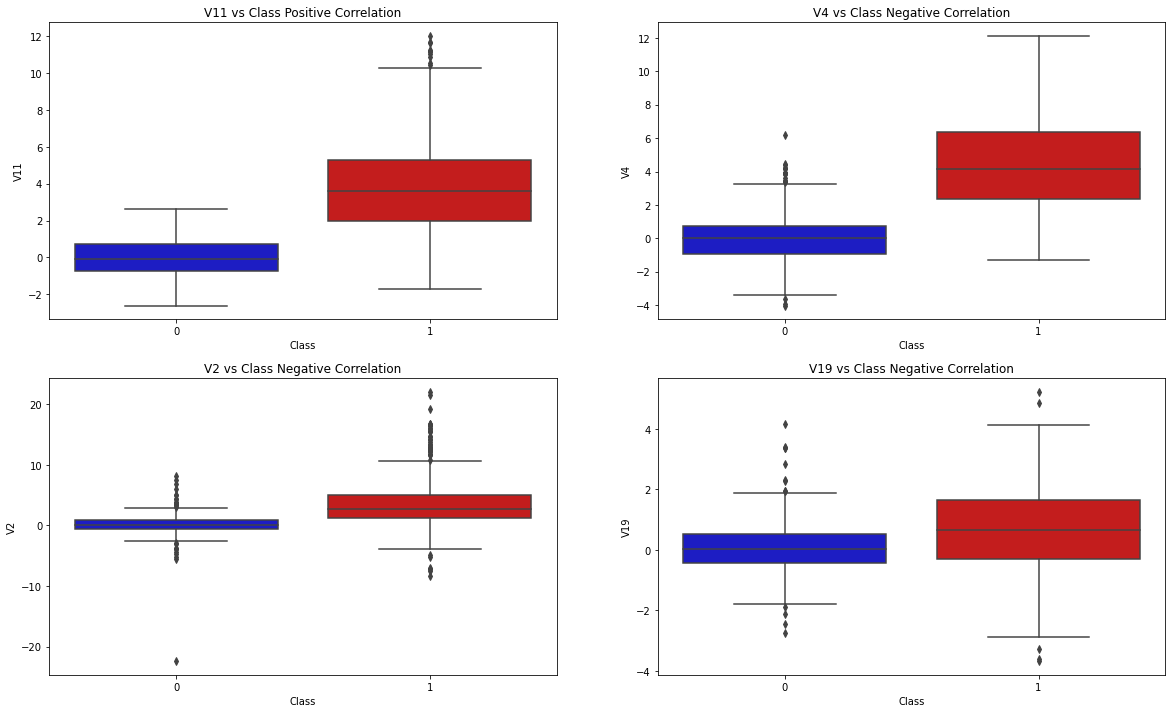

In [19]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,12))
sns.boxplot(x="Class", y="V11", data=New_DataFrame, palette=Colors, ax=axes[0, 0])
axes[0, 0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=New_DataFrame, palette=Colors, ax=axes[0, 1])
axes[0, 1].set_title('V4 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V2", data=New_DataFrame, palette=Colors, ax=axes[1, 0])
axes[1, 0].set_title('V2 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V19", data=New_DataFrame, palette=Colors, ax=axes[1, 1])
axes[1, 1].set_title('V19 vs Class Negative Correlation')

plt.show()

## Interquartile Range Method:
### Outlier Removal Tradeoff.

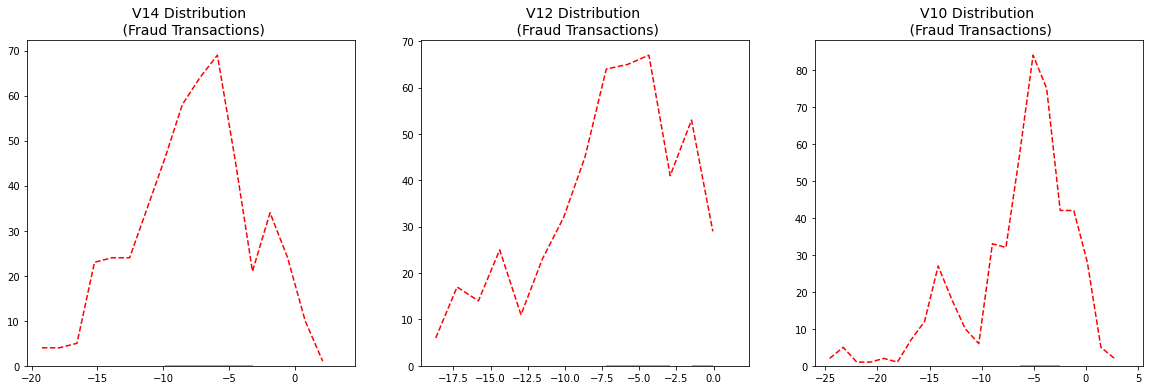

In [27]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

FraudDistribution_V14 = New_DataFrame.loc[New_DataFrame['Class'] == 1, 'V14'].values
hist, bins = np.histogram(FraudDistribution_V14, bins='auto')
ax1.hist(FraudDistribution_V14, bins=bins, color='#FB8861', density=True)
ax1.plot(bins[:-1], hist, color='red', linestyle='dashed')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

FraudDistribution_V12 = New_DataFrame.loc[New_DataFrame['Class'] == 1, 'V12'].values
hist, bins = np.histogram(FraudDistribution_V12, bins='auto')
ax2.hist(FraudDistribution_V12, bins=bins, color='#FB8861', density=True)
ax2.plot(bins[:-1], hist, color='red', linestyle='dashed')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

FraudDistribution_V10 = New_DataFrame.loc[New_DataFrame['Class'] == 1, 'V10'].values
hist, bins = np.histogram(FraudDistribution_V10, bins='auto')
ax3.hist(FraudDistribution_V10, bins=bins, color='#FB8861', density=True)
ax3.plot(bins[:-1], hist, color='red', linestyle='dashed')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [29]:
# Removing outliers.
#V14
Fraud_V14 = New_DataFrame['V14'].loc[New_DataFrame['Class'] == 1].values
q25, q75 = np.percentile(Fraud_V14, 25), np.percentile(Fraud_V14, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
iqr_V14 = q75 - q25
print('iqr: {}'.format(iqr_V14))

CutOff_V14 = iqr_V14 * 1.5
Lower_V14, Upper_V14 = q25 - CutOff_V14, q75 + CutOff_V14
print('Cut Off: {}'.format(CutOff_V14))
print('V14 Lower: {}'.format(Lower_V14))
print('V14 Upper: {}'.format(Upper_V14))

Outliers = [x for x in Fraud_V14 if x < Lower_V14 or x > Upper_V14]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(Outliers)))
print('V14 outliers: {}'.format(Outliers))

New_DataFrame = New_DataFrame.drop(New_DataFrame[])

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers: [-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]
